In [2]:
# import libraries
import random
import time as time
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# tree class
class Tree:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

    # contains method as given in assignment manual
    def __contains__(self, item):
        if self.value == item:
            return True
        elif self.left and item < self.value:
            return item in self.left
        elif self.right and item > self.value:
            return item in self.right
        else:
            return False

    # add method
    # add node into tree in correct space (in-order) if unique
    # if number seen then do nothing
    def add(self, num):
        # if tree is empty
        if not self.value: self.value = num

        # if at leaf node:
        elif self.left == None and self.right == None:
            if self.value > num: self.left = Tree(num)
            elif self.value < num: self.right = Tree(num)


        # not at leaf node but could add
        elif self.value > num and self.left == None: self.left = Tree(num)
        elif self.value < num and self.right == None: self.right = Tree(num)

        # keep recursing until available space
        elif self.value > num: self.left.add(num)
        elif self.value < num: self.right.add(num)

        return self

In [4]:
# print tree as list in-order
def printTree(tree, list=[]):
    if not tree: return []
    list.append(tree.value)
    if tree.left: printTree(tree.left, list)
    if tree.right: printTree(tree.right, list)
    return list

In [5]:
print("testing add function...")
print("initializing empty tree...")
test_tree = Tree(None)
print("Root node value is", test_tree.value)

print("adding 5 to empty tree...")
test_tree.add(5)
print("Output tree is", printTree(test_tree, list=[]))

print("adding 4 to test tree...")
test_tree.add(4)
print("Output tree is", printTree(test_tree, list=[]))

print("adding 10 to test tree...")
test_tree.add(10)
print("Output tree is", printTree(test_tree, list=[]))

print("adding 10 repeatedly to test tree, should not change tree...")
test_tree.add(10)
print("Output tree is", printTree(test_tree, list=[]))

print("Testing contain with existing tree node (5)...")
print(5 in test_tree)

print("Testing contain with non-existent tree node (3)...")
print(3 in test_tree)

print("testing using given code in assignment manual... (Note Tree() is given a parameter of value None because Tree class code given in class was designed to have an input value)")
my_tree = Tree(None)
for item in [55, 62, 37, 49, 71, 14, 17]:
    my_tree.add(item)
print(printTree(my_tree, list=[]))

testing add function...
initializing empty tree...
Root node value is None
adding 5 to empty tree...
Output tree is [5]
adding 4 to test tree...
Output tree is [5, 4]
adding 10 to test tree...
Output tree is [5, 4, 10]
adding 10 repeatedly to test tree, should not change tree...
Output tree is [5, 4, 10]
Testing contain with existing tree node (5)...
True
Testing contain with non-existent tree node (3)...
False
testing using given code in assignment manual... (Note Tree() is given a parameter of value None because Tree class code given in class was designed to have an input value)
[55, 37, 14, 17, 49, 62, 71]


In [6]:
# runtime analysis
n_1 = 10
n_2 = 100
n_3 = 1000
t_1 = Tree(None)
t_2 = Tree(None)
t_3 = Tree(None)

# generate random numbers to populate each tree:
def generate_trees(tree, lim):
    for i in range(lim):
        num = random.randint(1, 101)
        tree.add(num)

generate_trees(t_1, n_1)
generate_trees(t_2, n_2)
generate_trees(t_3, n_3)

# storing runtime of random calls of contains to above trees
def calc_runtime(tree, iter, lim):
    start = time.time_ns()
    for i in range(iter):
        num = random.randint(1,lim)
        ret = num in tree
    now = time.time_ns()
    return  now-start

d_1 = {}
d_2 = {}
d_3 = {}
for i in [0, 1, 10, 50, 100, 500, 1000, 5000, 6000, 7000, 8000]:
    d_1[i] = calc_runtime(t_1, i, n_1*2)
    d_2[i] = calc_runtime(t_2, i, n_2*2)
    d_3[i] = calc_runtime(t_3, i, n_3*2)
print(d_1)
print(d_2)
print(d_3)

{0: 0, 1: 997500, 10: 0, 50: 0, 100: 0, 500: 0, 1000: 1002300, 5000: 3986200, 6000: 5984600, 7000: 5982900, 8000: 6953100}
{0: 0, 1: 0, 10: 0, 50: 0, 100: 0, 500: 999200, 1000: 997600, 5000: 7948300, 6000: 8977100, 7000: 10967600, 8000: 11967300}
{0: 0, 1: 0, 10: 0, 50: 0, 100: 0, 500: 1018400, 1000: 998100, 5000: 4986600, 6000: 5987900, 7000: 7009400, 8000: 9006500}


In [7]:
# turning time tables into dataframes for later plotting
df_1 = pd.DataFrame.from_dict(d_1, orient="index").reset_index()
df_1.columns=['calls to contains', 'runtime (seconds)']

df_2 = pd.DataFrame.from_dict(d_2, orient="index").reset_index()
df_2.columns=['calls to contains', 'runtime (seconds)']

df_3 = pd.DataFrame.from_dict(d_3, orient="index").reset_index()
df_3.columns=['calls to contains', 'runtime (seconds)']

# merge data frames
run_df = df_1.merge(df_2, how='outer', on='calls to contains')
run_df.columns=['calls to contains', 'runtime n=10', 'runtime n=100']
run_df = run_df.merge(df_3, how='outer', on='calls to contains')
run_df.columns=['calls to contains', 'runtime n=10', 'runtime n=100', 'runtime n=1000']

# add linear and exponential columns
linear = [0, 1, 10, 50, 100, 500, 1000, 5000,6000, 7000, 8000]
exponential = [0, 1, 100, 2500, 10000, 250000, 1000000, 25000000, 6000**2, 7000**2, 8000**2]
run_df['linear'] = linear
run_df['exponential'] = exponential
run_df.head(15)

,calls to contains,runtime n=10,runtime n=100,runtime n=1000,linear,exponential
0,0,0,0,0,0,0
1,1,997500,0,0,1,1
2,10,0,0,0,10,100
3,50,0,0,0,50,2500
4,100,0,0,0,100,10000
5,500,0,999200,1018400,500,250000
6,1000,1002300,997600,998100,1000,1000000
7,5000,3986200,7948300,4986600,5000,25000000
8,6000,5984600,8977100,5987900,6000,36000000
9,7000,5982900,10967600,7009400,7000,49000000


[None, None]

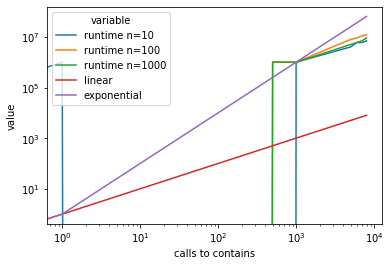

In [8]:
# plot runtime graph for t_1 with varying number of calls from 1-1000
# plt = sns.lineplot(data = pd.melt(run_df, ['calls to contains']), x = 'calls to contains', y = 'value', hue='variable')
plt = sns.lineplot(x = 'calls to contains', y = 'value', hue='variable', data = pd.melt(run_df, ['calls to contains']))
plt.set(xscale="log", yscale="log")

[None, None]

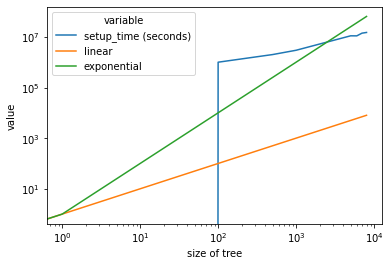

In [15]:
# analyze setup-time of different-sized trees

def calc_setup_runtime(size):
    start = time.time_ns()
    tree = Tree(0)
    generate_trees(tree, size)
    now = time.time_ns()
    return  now-start

d_setup = {}
for i in [0, 1, 10, 50, 100, 500, 1000, 5000,6000, 7000, 8000]:
    d_setup[i] = calc_setup_runtime(i)

df_setup = pd.DataFrame.from_dict(d_setup, orient='index').reset_index()
df_setup['linear'] = linear
df_setup['exponential'] = exponential
df_setup.columns = ['size of tree', 'setup_time (seconds)', 'linear', 'exponential']
df_setup.head(15)

# plot
plt = sns.lineplot(x = 'size of tree', y = 'value', hue='variable', data = pd.melt(df_setup, ['size of tree']))
plt.set(xscale="log", yscale="log")